In [2]:
from google.colab import drive
import os

# Check if drive is already mounted
if not os.path.exists('/content/drive'):
  try:
    drive.mount('/content/drive')
    print("Google Drive mounted successfully!")
  except ValueError as e:
    print(f"Error mounting Google Drive: {e}")
    print("Please check your internet connection and authentication.")
else:
  print("Google Drive is already mounted.")

import pandas as pd
file_path = '/content/drive/MyDrive/Project_X/retail sales.xlsx'
xls = pd.ExcelFile(file_path)
sheet_names = xls.sheet_names
sheet_names

Mounted at /content/drive
Google Drive mounted successfully!


['Sheet1']

In [3]:
df = xls.parse(sheet_names[0])
df.head(), df.columns
series = df['retail.sales'].values
series

array([1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.5, 2.6, 2.7, 2.8, 2.9,
       3.1, 3.3, 3.4, 3.5, 3.6, 3.8, 4. , 4.1, 4.2, 4.3, 4.4, 4.6, 4.7,
       4.8, 4.9, 5. , 5.1])

In [4]:
n_train = int(len(series) * 0.8)
series_train, series_test = series[0:n_train], series[n_train:len(series)]
print('Length of training set:', n_train)
print('Training set:', series_train)
print('Testing set:', series_test)

Length of training set: 24
Training set: [1.5 1.6 1.7 1.8 1.9 2.1 2.2 2.3 2.5 2.6 2.7 2.8 2.9 3.1 3.3 3.4 3.5 3.6
 3.8 4.  4.1 4.2 4.3 4.4]
Testing set: [4.6 4.7 4.8 4.9 5.  5.1]


In [5]:
import numpy as np
X_train = series_train[:-1].reshape(-1, 1)
y_train = series_train[1:]
print('X_train:', X_train)
print('y_train:', y_train)

X_train: [[1.5]
 [1.6]
 [1.7]
 [1.8]
 [1.9]
 [2.1]
 [2.2]
 [2.3]
 [2.5]
 [2.6]
 [2.7]
 [2.8]
 [2.9]
 [3.1]
 [3.3]
 [3.4]
 [3.5]
 [3.6]
 [3.8]
 [4. ]
 [4.1]
 [4.2]
 [4.3]]
y_train: [1.6 1.7 1.8 1.9 2.1 2.2 2.3 2.5 2.6 2.7 2.8 2.9 3.1 3.3 3.4 3.5 3.6 3.8
 4.  4.1 4.2 4.3 4.4]


In [6]:
X_test = np.concatenate(([series_train[-1]], series_test[:-1])).reshape(-1, 1)
y_test = series_test
print('X_test:', X_test)
print('y_test:', y_test)

X_test: [[4.4]
 [4.6]
 [4.7]
 [4.8]
 [4.9]
 [5. ]]
y_test: [4.6 4.7 4.8 4.9 5.  5.1]


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler_X = MinMaxScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
scaler_y = MinMaxScaler()
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()
print('X_train_scaled:', X_train_scaled)
print('y_train_scaled:', y_train_scaled)
print('X_test_scaled:', X_test_scaled)

X_train_scaled: [[0.        ]
 [0.03571429]
 [0.07142857]
 [0.10714286]
 [0.14285714]
 [0.21428571]
 [0.25      ]
 [0.28571429]
 [0.35714286]
 [0.39285714]
 [0.42857143]
 [0.46428571]
 [0.5       ]
 [0.57142857]
 [0.64285714]
 [0.67857143]
 [0.71428571]
 [0.75      ]
 [0.82142857]
 [0.89285714]
 [0.92857143]
 [0.96428571]
 [1.        ]]
y_train_scaled: [0.         0.03571429 0.07142857 0.10714286 0.17857143 0.21428571
 0.25       0.32142857 0.35714286 0.39285714 0.42857143 0.46428571
 0.53571429 0.60714286 0.64285714 0.67857143 0.71428571 0.78571429
 0.85714286 0.89285714 0.92857143 0.96428571 1.        ]
X_test_scaled: [[1.03571429]
 [1.10714286]
 [1.14285714]
 [1.17857143]
 [1.21428571]
 [1.25      ]]


In [8]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=0)
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=0)
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')

In [9]:
dt_model.fit(X_train_scaled, y_train_scaled)
rf_model.fit(X_train_scaled, y_train_scaled)
lr_model.fit(X_train_scaled, y_train_scaled)
svr_model.fit(X_train_scaled, y_train_scaled)

SVR()

In [10]:
dt_pred_test_scaled = dt_model.predict(X_test_scaled)
rf_pred_test_scaled = rf_model.predict(X_test_scaled)
lr_pred_test_scaled = lr_model.predict(X_test_scaled)
svr_pred_test_scaled = svr_model.predict(X_test_scaled)

In [11]:
dt_pred_test = scaler_y.inverse_transform(dt_pred_test_scaled.reshape(-1, 1)).flatten()
rf_pred_test = scaler_y.inverse_transform(rf_pred_test_scaled.reshape(-1, 1)).flatten()
lr_pred_test = scaler_y.inverse_transform(lr_pred_test_scaled.reshape(-1, 1)).flatten()
svr_pred_test = scaler_y.inverse_transform(svr_pred_test_scaled.reshape(-1, 1)).flatten()
print('Forecasting results of decision tree regression model in testing set:', dt_pred_test)
print('Forecasting results of random forest model in testing set:', rf_pred_test)
print('Forecasting results of linear regression model in testing set:', lr_pred_test)
print('Forecasting results of support vector regression model in testing set:', svr_pred_test)

Forecasting results of decision tree regression model in testing set: [4.4 4.4 4.4 4.4 4.4 4.4]
Forecasting results of random forest model in testing set: [4.361 4.361 4.361 4.361 4.361 4.361]
Forecasting results of linear regression model in testing set: [4.529677   4.73014483 4.83037874 4.93061265 5.03084656 5.13108048]
Forecasting results of support vector regression model in testing set: [4.10537217 3.994897   3.90731944 3.80594974 3.69730307 3.58762624]


In [12]:
def smape(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  numerator = np.abs(y_pred - y_true)
  denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
  return np.mean(numerator / denominator) * 100

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
metrics = {}
metrics['MAE'] = {
    'Decision Tree': mean_absolute_error(y_test, dt_pred_test),
    'Random Forest': mean_absolute_error(y_test, rf_pred_test),
    'Linear Regression': mean_absolute_error(y_test, lr_pred_test),
    'SVR': mean_absolute_error(y_test, svr_pred_test)
}
metrics['RMSE'] = {
    'Decision Tree': np.sqrt(mean_squared_error(y_test, dt_pred_test)),
    'Random Forest': np.sqrt(mean_squared_error(y_test, rf_pred_test)),
    'Linear Regression': np.sqrt(mean_squared_error(y_test, lr_pred_test)),
    'SVR': np.sqrt(mean_squared_error(y_test, svr_pred_test))
}
metrics['SMAPE'] = {
    'Decision Tree': smape(y_test, dt_pred_test),
    'Random Forest': smape(y_test, rf_pred_test),
    'Linear Regression': smape(y_test, lr_pred_test),
    'SVR': smape(y_test, svr_pred_test)
}
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

                        MAE      RMSE      SMAPE
Decision Tree      0.450000  0.481318   9.664832
Random Forest      0.489000  0.517965  10.552596
Linear Regression  0.037231  0.040066   0.776028
SVR                1.000255  1.058296  22.998854


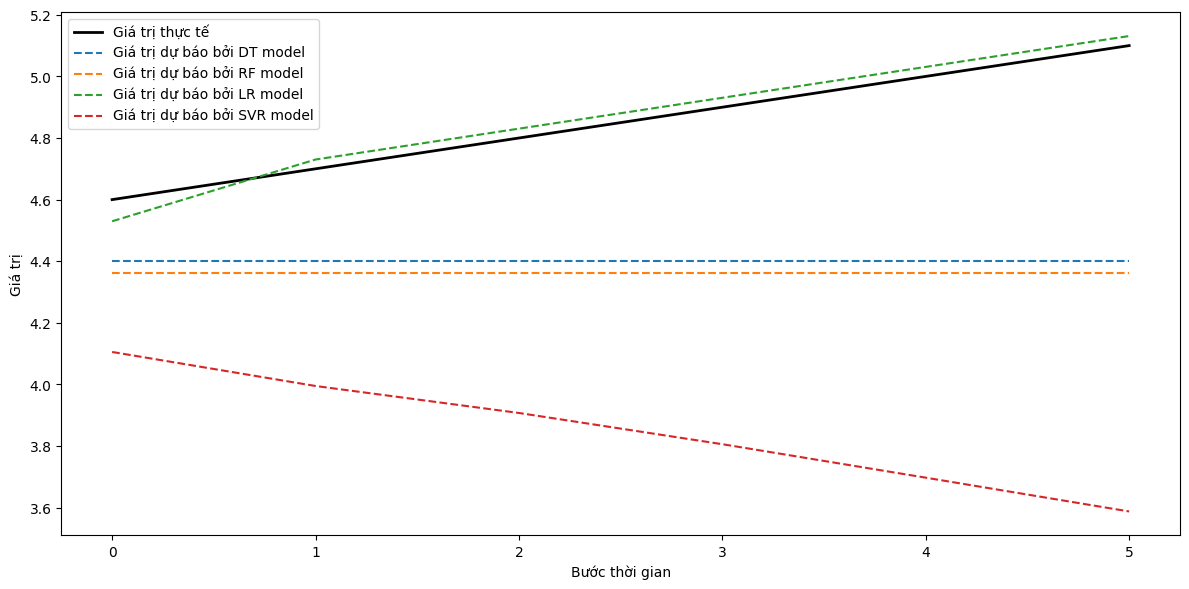

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Giá trị thực tế', color='black', linewidth=2)
plt.plot(dt_pred_test, label='Giá trị dự báo bởi DT model', linestyle='--')
plt.plot(rf_pred_test, label='Giá trị dự báo bởi RF model', linestyle='--')
plt.plot(lr_pred_test, label='Giá trị dự báo bởi LR model', linestyle='--')
plt.plot(svr_pred_test, label='Giá trị dự báo bởi SVR model', linestyle='--')
plt.xlabel('Bước thời gian')
plt.ylabel('Giá trị')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

print('X_train_reshaped shape:', X_train_reshaped.shape)
print('X_test_reshaped shape:', X_test_reshaped.shape)

X_train_reshaped shape: (23, 1, 1)
X_test_reshaped shape: (6, 1, 1)


In [33]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# ===== 1. LSTM =====
model_lstm = Sequential([
    LSTM(64, return_sequences=False, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1)
])
model_lstm.compile(optimizer='adam', loss='mae')
print("Training LSTM model...")
history_lstm = model_lstm.fit(X_train_reshaped, y_train_scaled, epochs=1000, batch_size=16, validation_split=0.1, verbose=2, callbacks=[early_stopping])
y_pred_lstm_scaled = model_lstm.predict(X_test_reshaped)
y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm_scaled).flatten()

# ===== 2. BiLSTM =====
model_bilstm = Sequential([
    Bidirectional(LSTM(64, return_sequences=False), input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1)
])
model_bilstm.compile(optimizer='adam', loss='mae')
print("\nTraining BiLSTM model...")
history_bilstm = model_bilstm.fit(X_train_reshaped, y_train_scaled, epochs=1000, batch_size=16, validation_split=0.1, verbose=2, callbacks=[early_stopping])
y_pred_bilstm_scaled = model_bilstm.predict(X_test_reshaped)
y_pred_bilstm = scaler_y.inverse_transform(y_pred_bilstm_scaled).flatten()

# ===== 3. CNN 1D =====
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(1)
])
model_cnn.compile(optimizer='adam', loss='mae')
print("\nTraining CNN 1D model...")
history_cnn = model_cnn.fit(X_train_reshaped, y_train_scaled, epochs=1000, batch_size=16, validation_split=0.1, verbose=2, callbacks=[early_stopping])
y_pred_cnn_scaled = model_cnn.predict(X_test_reshaped)
y_pred_cnn = scaler_y.inverse_transform(y_pred_cnn_scaled).flatten()

Training LSTM model...
Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 2s - 1s/step - loss: 0.4264 - val_loss: 0.9516
Epoch 2/1000
2/2 - 0s - 145ms/step - loss: 0.4176 - val_loss: 0.9381
Epoch 3/1000
2/2 - 0s - 45ms/step - loss: 0.4085 - val_loss: 0.9243
Epoch 4/1000
2/2 - 0s - 71ms/step - loss: 0.3995 - val_loss: 0.9103
Epoch 5/1000
2/2 - 0s - 68ms/step - loss: 0.3904 - val_loss: 0.8960
Epoch 6/1000
2/2 - 0s - 47ms/step - loss: 0.3810 - val_loss: 0.8816
Epoch 7/1000
2/2 - 0s - 46ms/step - loss: 0.3725 - val_loss: 0.8670
Epoch 8/1000
2/2 - 0s - 45ms/step - loss: 0.3640 - val_loss: 0.8526
Epoch 9/1000
2/2 - 0s - 45ms/step - loss: 0.3553 - val_loss: 0.8382
Epoch 10/1000
2/2 - 0s - 53ms/step - loss: 0.3468 - val_loss: 0.8238
Epoch 11/1000
2/2 - 0s - 71ms/step - loss: 0.3382 - val_loss: 0.8094
Epoch 12/1000
2/2 - 0s - 72ms/step - loss: 0.3297 - val_loss: 0.7948
Epoch 13/1000
2/2 - 0s - 70ms/step - loss: 0.3223 - val_loss: 0.7798
Epoch 14/1000
2/2 - 0s - 66ms/step - loss: 0.3140 - val_loss: 0.7646
Epoch 15/1000
2/2 - 0s - 46ms/step - loss: 0.3053 - val_l

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 - 5s - 3s/step - loss: 0.4176 - val_loss: 0.9250
Epoch 2/1000
2/2 - 0s - 109ms/step - loss: 0.4050 - val_loss: 0.9048
Epoch 3/1000
2/2 - 0s - 72ms/step - loss: 0.3922 - val_loss: 0.8846
Epoch 4/1000
2/2 - 0s - 69ms/step - loss: 0.3794 - val_loss: 0.8641
Epoch 5/1000
2/2 - 0s - 69ms/step - loss: 0.3677 - val_loss: 0.8440
Epoch 6/1000
2/2 - 0s - 70ms/step - loss: 0.3552 - val_loss: 0.8242
Epoch 7/1000
2/2 - 0s - 50ms/step - loss: 0.3435 - val_loss: 0.8039
Epoch 8/1000
2/2 - 0s - 67ms/step - loss: 0.3322 - val_loss: 0.7831
Epoch 9/1000
2/2 - 0s - 103ms/step - loss: 0.3200 - val_loss: 0.7621
Epoch 10/1000
2/2 - 0s - 96ms/step - loss: 0.3095 - val_loss: 0.7409
Epoch 11/1000
2/2 - 0s - 47ms/step - loss: 0.2980 - val_loss: 0.7197
Epoch 12/1000
2/2 - 0s - 83ms/step - loss: 0.2868 - val_loss: 0.6984
Epoch 13/1000
2/2 - 0s - 49ms/step - loss: 0.2760 - val_loss: 0.6765
Epoch 14/1000
2/2 - 0s - 70ms/step - loss: 0.2650 - val_loss: 0.6539
Epoch 15/1000
2/2 - 0s - 71ms/step - loss: 0.2541 - val_

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 - 2s - 995ms/step - loss: 0.4505 - val_loss: 0.9558
Epoch 2/1000
2/2 - 0s - 92ms/step - loss: 0.4116 - val_loss: 0.8869
Epoch 3/1000
2/2 - 0s - 88ms/step - loss: 0.3751 - val_loss: 0.8175
Epoch 4/1000
2/2 - 0s - 97ms/step - loss: 0.3393 - val_loss: 0.7477
Epoch 5/1000
2/2 - 0s - 92ms/step - loss: 0.3055 - val_loss: 0.6798
Epoch 6/1000
2/2 - 0s - 156ms/step - loss: 0.2694 - val_loss: 0.6118
Epoch 7/1000
2/2 - 0s - 115ms/step - loss: 0.2379 - val_loss: 0.5428
Epoch 8/1000
2/2 - 0s - 50ms/step - loss: 0.2090 - val_loss: 0.4739
Epoch 9/1000
2/2 - 0s - 48ms/step - loss: 0.1769 - val_loss: 0.4045
Epoch 10/1000
2/2 - 0s - 75ms/step - loss: 0.1489 - val_loss: 0.3378
Epoch 11/1000
2/2 - 0s - 65ms/step - loss: 0.1225 - val_loss: 0.2720
Epoch 12/1000
2/2 - 0s - 45ms/step - loss: 0.1033 - val_loss: 0.2107
Epoch 13/1000
2/2 - 0s - 69ms/step - loss: 0.0818 - val_loss: 0.1549
Epoch 14/1000
2/2 - 0s - 66ms/step - loss: 0.0740 - val_loss: 0.1045
Epoch 15/1000
2/2 - 0s - 51ms/step - loss: 0.0683 - v

In [35]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    smape_score = smape(y_true, y_pred)
    return mae, rmse, smape_score

# ===== Evaluate and print results =====
mae_lstm, rmse_lstm, smape_lstm = evaluate_model(y_test, y_pred_lstm)
mae_bilstm, rmse_bilstm, smape_bilstm = evaluate_model(y_test, y_pred_bilstm)
mae_cnn, rmse_cnn, smape_cnn = evaluate_model(y_test, y_pred_cnn)

print("LSTM     -> MAE:", mae_lstm, "RMSE:", rmse_lstm, "SMAPE:", smape_lstm)
print("BiLSTM   -> MAE:", mae_bilstm, "RMSE:", rmse_bilstm, "SMAPE:", smape_bilstm)
print("CNN 1D   -> MAE:", mae_cnn, "RMSE:", rmse_cnn, "SMAPE:", smape_cnn)

LSTM     -> MAE: 0.0485260645548502 RMSE: 0.0526633104213253 SMAPE: 1.0048834046491864
BiLSTM   -> MAE: 0.4897500038146972 RMSE: 0.4912365116006407 SMAPE: 10.62430596609543
CNN 1D   -> MAE: 0.018419361114501893 RMSE: 0.039265081063568234 SMAPE: 0.40107795883049846


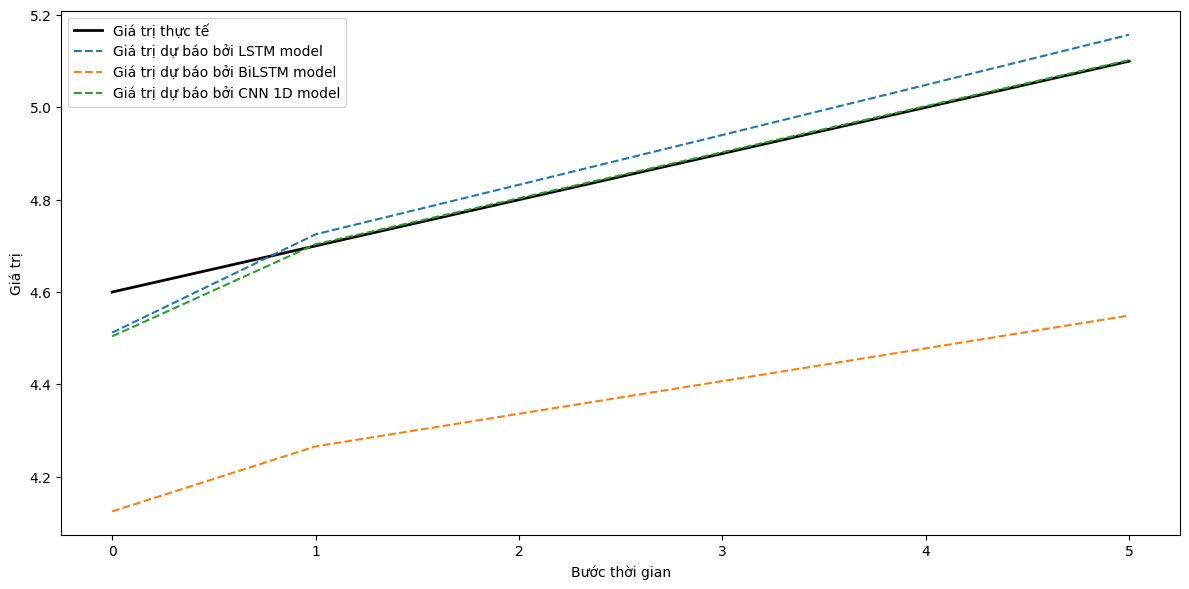

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Giá trị thực tế', color='black', linewidth=2)
plt.plot(y_pred_lstm, label='Giá trị dự báo bởi LSTM model', linestyle='--')
plt.plot(y_pred_bilstm, label='Giá trị dự báo bởi BiLSTM model', linestyle='--')
plt.plot(y_pred_cnn, label='Giá trị dự báo bởi CNN 1D model', linestyle='--')
plt.xlabel('Bước thời gian')
plt.ylabel('Giá trị')
plt.legend()
plt.tight_layout()
plt.show()

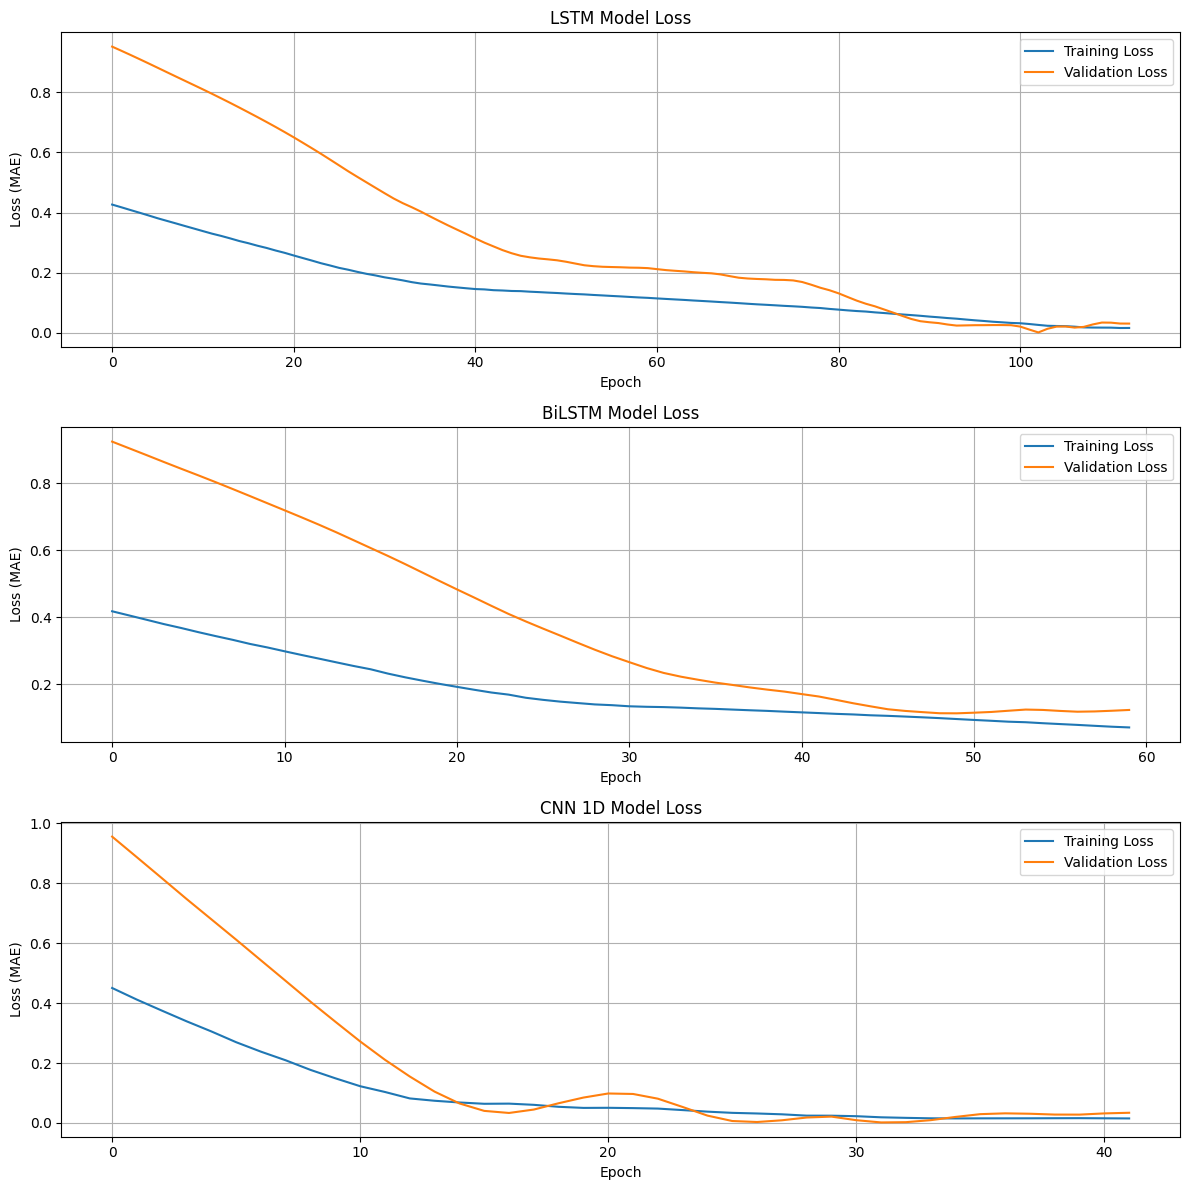


--- Loss Metrics for All Models ---
Traditional Models:


,MAE,RMSE,SMAPE
Decision Tree,0.450000,0.481318,9.664832
Random Forest,0.489000,0.517965,10.552596
Linear Regression,0.037231,0.040066,0.776028
SVR,1.000255,1.058296,22.998854



Neural Network Models (evaluated on test set):
LSTM     -> MAE: 0.0485, RMSE: 0.0527, SMAPE: 1.0049
BiLSTM   -> MAE: 0.4898, RMSE: 0.4912, SMAPE: 10.6243
CNN 1D   -> MAE: 0.0184, RMSE: 0.0393, SMAPE: 0.4011


In [37]:
import matplotlib.pyplot as plt

# Get the training history for each neural network model
# Assuming history_lstm, history_bilstm, history_cnn are available from the previous training cell

# Plot loss for each neural network model
plt.figure(figsize=(12, 12)) # Adjusted figure size for 3 rows

# Plot LSTM loss
plt.subplot(3, 1, 1) # Corrected subplot call
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True) # Added grid for better readability

# Plot BiLSTM loss
plt.subplot(3, 1, 2) # Corrected subplot call
plt.plot(history_bilstm.history['loss'], label='Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.title('BiLSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True) # Added grid for better readability

# Plot CNN 1D loss
plt.subplot(3, 1, 3) # Corrected subplot call
plt.plot(history_cnn.history['loss'], label='Training Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('CNN 1D Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MAE)')
plt.legend()
plt.grid(True) # Added grid for better readability

plt.tight_layout()
plt.show()

# Print the loss metrics for all models
print("\n--- Loss Metrics for All Models ---")
# Assuming metrics_df, mae_lstm, rmse_lstm, smape_lstm, etc. are available from previous cells

# Check if metrics_df exists before printing
if 'metrics_df' in locals():
    print("Traditional Models:")
    display(metrics_df)
else:
    print("Traditional model metrics (metrics_df) not found. Please ensure the cell defining metrics_df was run.")

print("\nNeural Network Models (evaluated on test set):")
# Corrected f-string formatting for SMAPE (assuming it's already a percentage or not a percentage that needs a % sign added)
print(f"LSTM     -> MAE: {mae_lstm:.4f}, RMSE: {rmse_lstm:.4f}, SMAPE: {smape_lstm:.4f}")
print(f"BiLSTM   -> MAE: {mae_bilstm:.4f}, RMSE: {rmse_bilstm:.4f}, SMAPE: {smape_bilstm:.4f}")
print(f"CNN 1D   -> MAE: {mae_cnn:.4f}, RMSE: {rmse_cnn:.4f}, SMAPE: {smape_cnn:.4f}")

In [39]:
# các giá trị loss từ thứ 9,10,11 từ cuối lên của 3 mô hình

print("\n--- Loss Metrics (Validation Loss at specific epochs from the end) ---")

# Get validation loss history for each model
val_loss_lstm = history_lstm.history['val_loss']
val_loss_bilstm = history_bilstm.history['val_loss']
val_loss_cnn = history_cnn.history['val_loss']

# Get the validation loss values at specific positions from the end
# Index -1 is the last element, -2 is the second to last, etc.
# So, -9 is the 9th element from the end, -10 is the 10th, and -11 is the 11th.
loss_at_epochs_from_end_lstm = [val_loss_lstm[-11], val_loss_lstm[-10], val_loss_lstm[-9]]
loss_at_epochs_from_end_bilstm = [val_loss_bilstm[-11], val_loss_bilstm[-10], val_loss_bilstm[-9]]
loss_at_epochs_from_end_cnn = [val_loss_cnn[-11], val_loss_cnn[-10], val_loss_cnn[-9]]

print(f"LSTM     -> Validation Losses (11th, 10th, 9th from end): {loss_at_epochs_from_end_lstm}")
print(f"BiLSTM   -> Validation Losses (11th, 10th, 9th from end): {loss_at_epochs_from_end_bilstm}")
print(f"CNN 1D   -> Validation Losses (11th, 10th, 9th from end): {loss_at_epochs_from_end_cnn}")


--- Loss Metrics (Validation Loss at specific epochs from the end) ---
LSTM     -> Validation Losses (11th, 10th, 9th from end): [0.0012909373035654426, 0.013325929641723633, 0.020652731880545616]
BiLSTM   -> Validation Losses (11th, 10th, 9th from end): [0.11246094852685928, 0.11432192474603653, 0.11652565002441406]
CNN 1D   -> Validation Losses (11th, 10th, 9th from end): [0.001647214055992663, 0.002528369426727295, 0.009232143871486187]
